# Simple Data Evaluation

### Theme
Optimising strategies to reduce costs in supply
chain management and improve logistics efficiency
### Goal
Teams will analyse a dataset provided to identify insights
and propose actionable strategies
### Data
Supply chain shipment and pricing data, including variables around
delivery schedules, shipment modes, vendors, and costs

### Target Variables
A) Disruption Likelihood Score — float (0–1). Likelihood of disruption.<br>
B) Delay Probability — float (0–1). Probability of shipment delay.<br>
C) Risk Classification — categorical {Low Risk, Moderate Risk, High Risk}. Risk class label.<br>
D) Delivery Time Deviation — float (hours). Deviation from expected delivery time.

### Task
to uncover key inefficiencies, and recommend actionable to reduce costs and improve logistics efficiency while maintaining service reliability.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ========== Load ==========
df = pd.read_csv("dynamic_supply_chain_logistics_dataset.csv")

# ========== EDA ==========
print("Shape:", df.shape)


Shape: (32065, 26)


In [3]:
print("\nData types:\n", df.dtypes)


Data types:
 timestamp                           object
vehicle_gps_latitude               float64
vehicle_gps_longitude              float64
fuel_consumption_rate              float64
eta_variation_hours                float64
traffic_congestion_level           float64
warehouse_inventory_level          float64
loading_unloading_time             float64
handling_equipment_availability    float64
order_fulfillment_status           float64
weather_condition_severity         float64
port_congestion_level              float64
shipping_costs                     float64
supplier_reliability_score         float64
lead_time_days                     float64
historical_demand                  float64
iot_temperature                    float64
cargo_condition_status             float64
route_risk_level                   float64
customs_clearance_time             float64
driver_behavior_score              float64
fatigue_monitoring_score           float64
disruption_likelihood_score        float

In [4]:
print("\nMissing values:\n", df.isna().sum())


Missing values:
 timestamp                          0
vehicle_gps_latitude               0
vehicle_gps_longitude              0
fuel_consumption_rate              0
eta_variation_hours                0
traffic_congestion_level           0
warehouse_inventory_level          0
loading_unloading_time             0
handling_equipment_availability    0
order_fulfillment_status           0
weather_condition_severity         0
port_congestion_level              0
shipping_costs                     0
supplier_reliability_score         0
lead_time_days                     0
historical_demand                  0
iot_temperature                    0
cargo_condition_status             0
route_risk_level                   0
customs_clearance_time             0
driver_behavior_score              0
fatigue_monitoring_score           0
disruption_likelihood_score        0
delay_probability                  0
risk_classification                0
delivery_time_deviation            0
dtype: int64


In [5]:
# Convert timestamp
if "timestamp" in df.columns:
    df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")


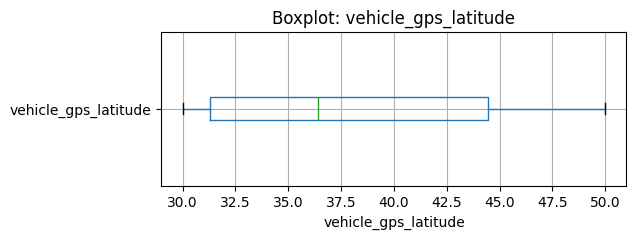

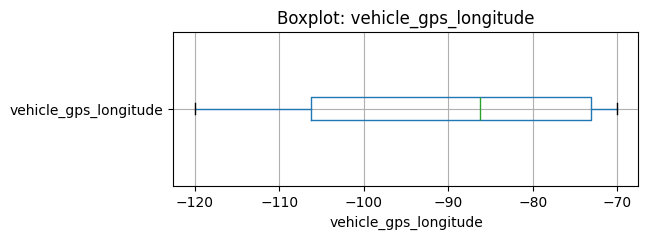

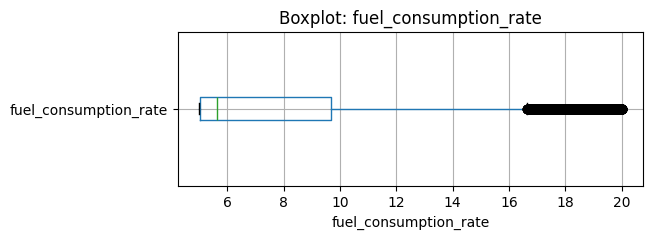

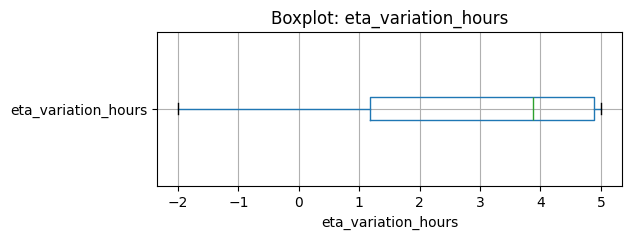

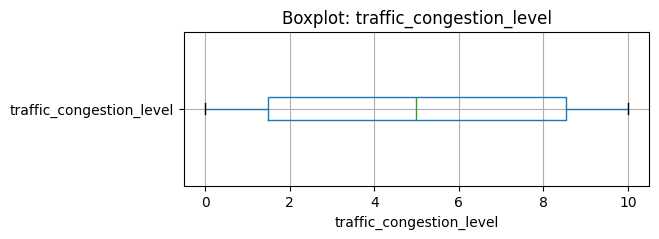

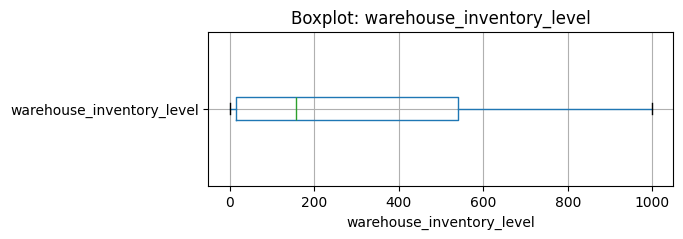

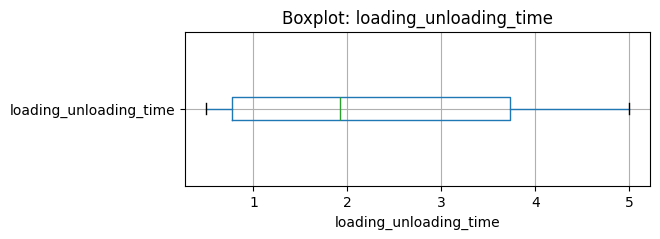

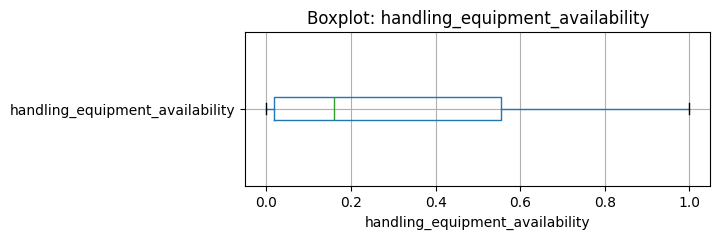

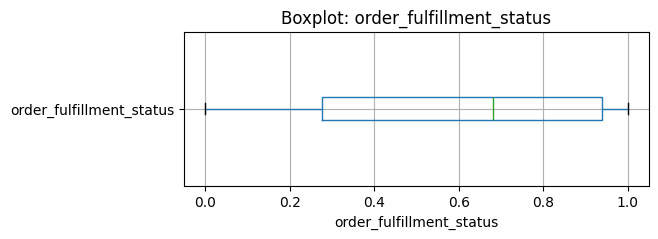

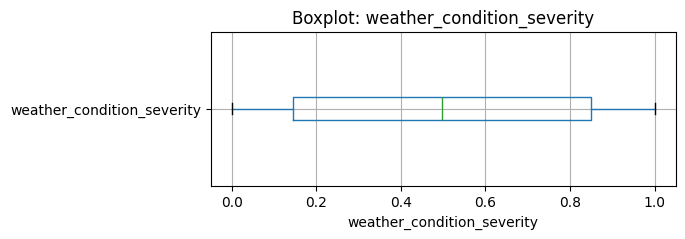

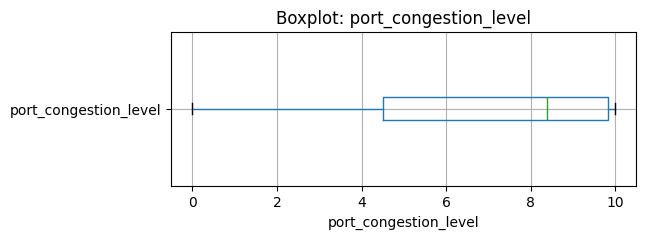

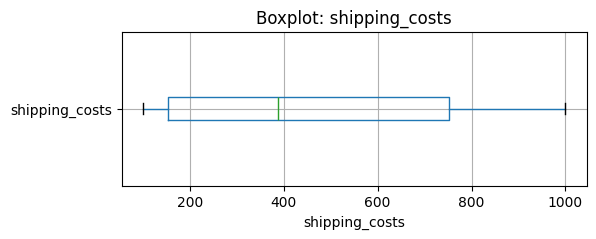

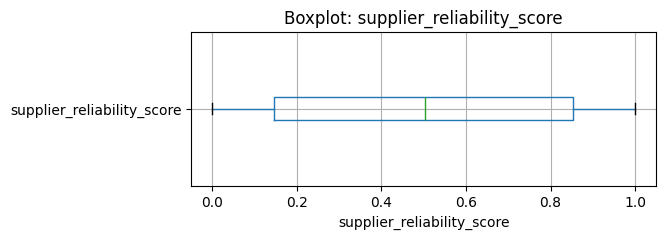

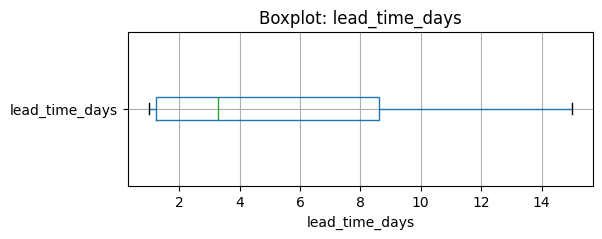

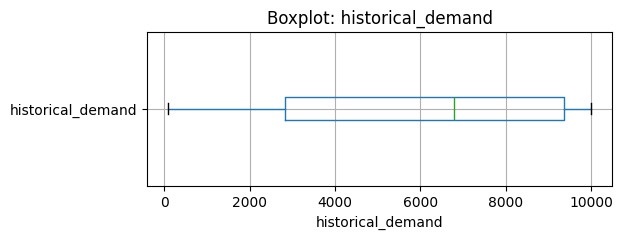

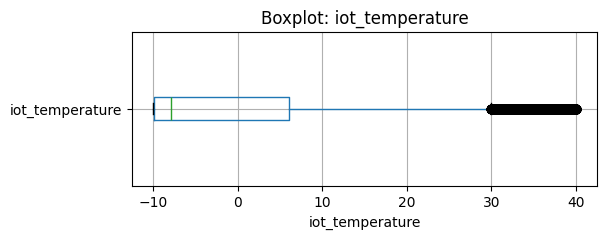

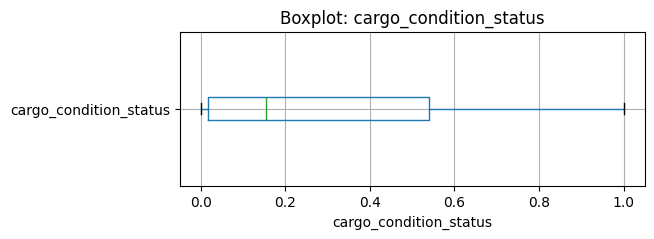

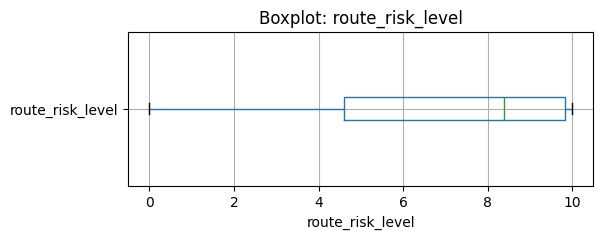

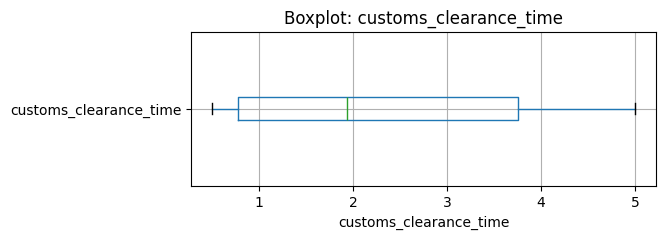

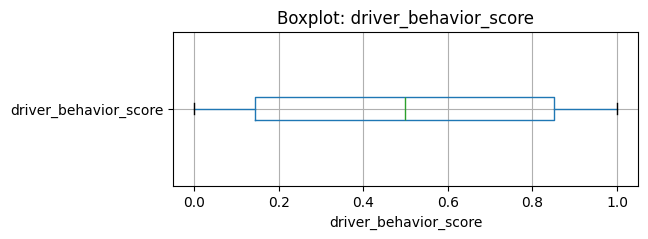

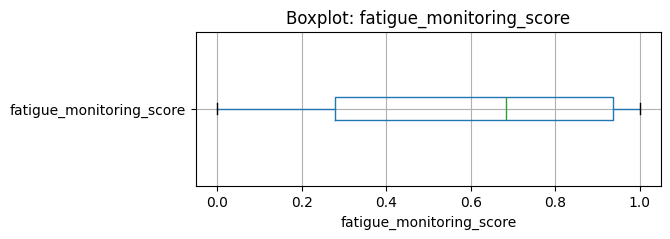

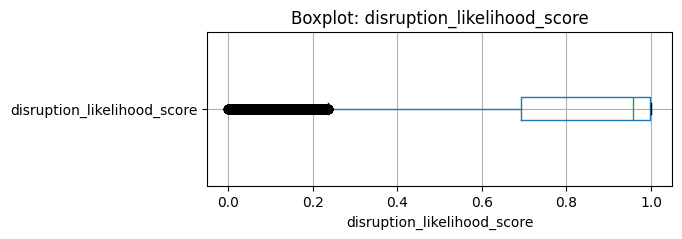

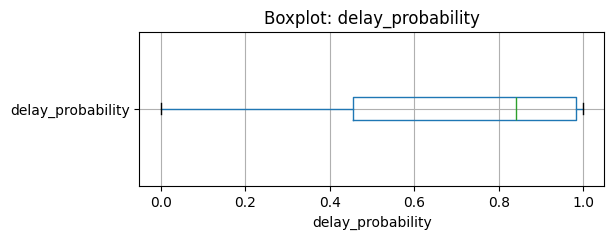

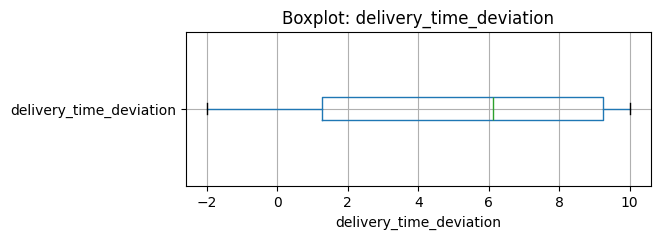

In [6]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(6, 2))   # shorter height since horizontal
    df.boxplot(column=col, vert=False)  # horizontal boxplot
    plt.title(f"Boxplot: {col}")
    plt.xlabel(col)
    plt.show()

#MAPE - better for outliers

### stripplot with sampling for 3 columns that have large amount of outliers

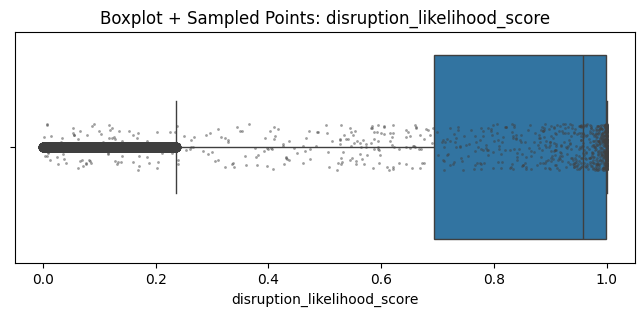

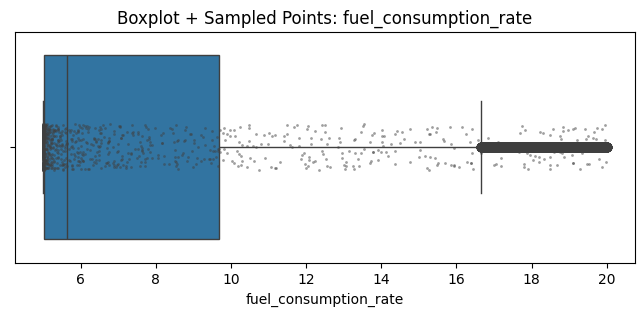

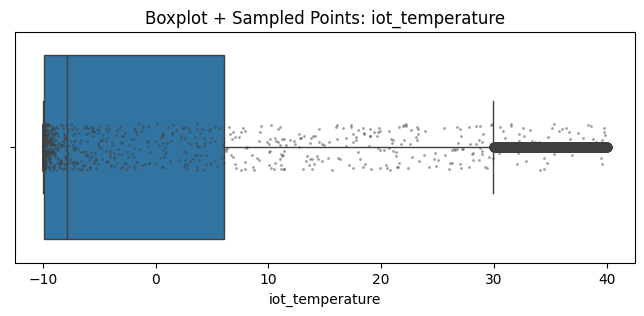

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_to_check = ["disruption_likelihood_score", "fuel_consumption_rate", "iot_temperature"]

for col in cols_to_check:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=df[col], orient="h", showfliers=True)

    # Sample only 1000 points for speed
    sample = df[col].sample(n=1000, random_state=42)
    sns.stripplot(x=sample, color=".25", orient="h", size=2, alpha=0.5)

    plt.title(f"Boxplot + Sampled Points: {col}")
    plt.show()

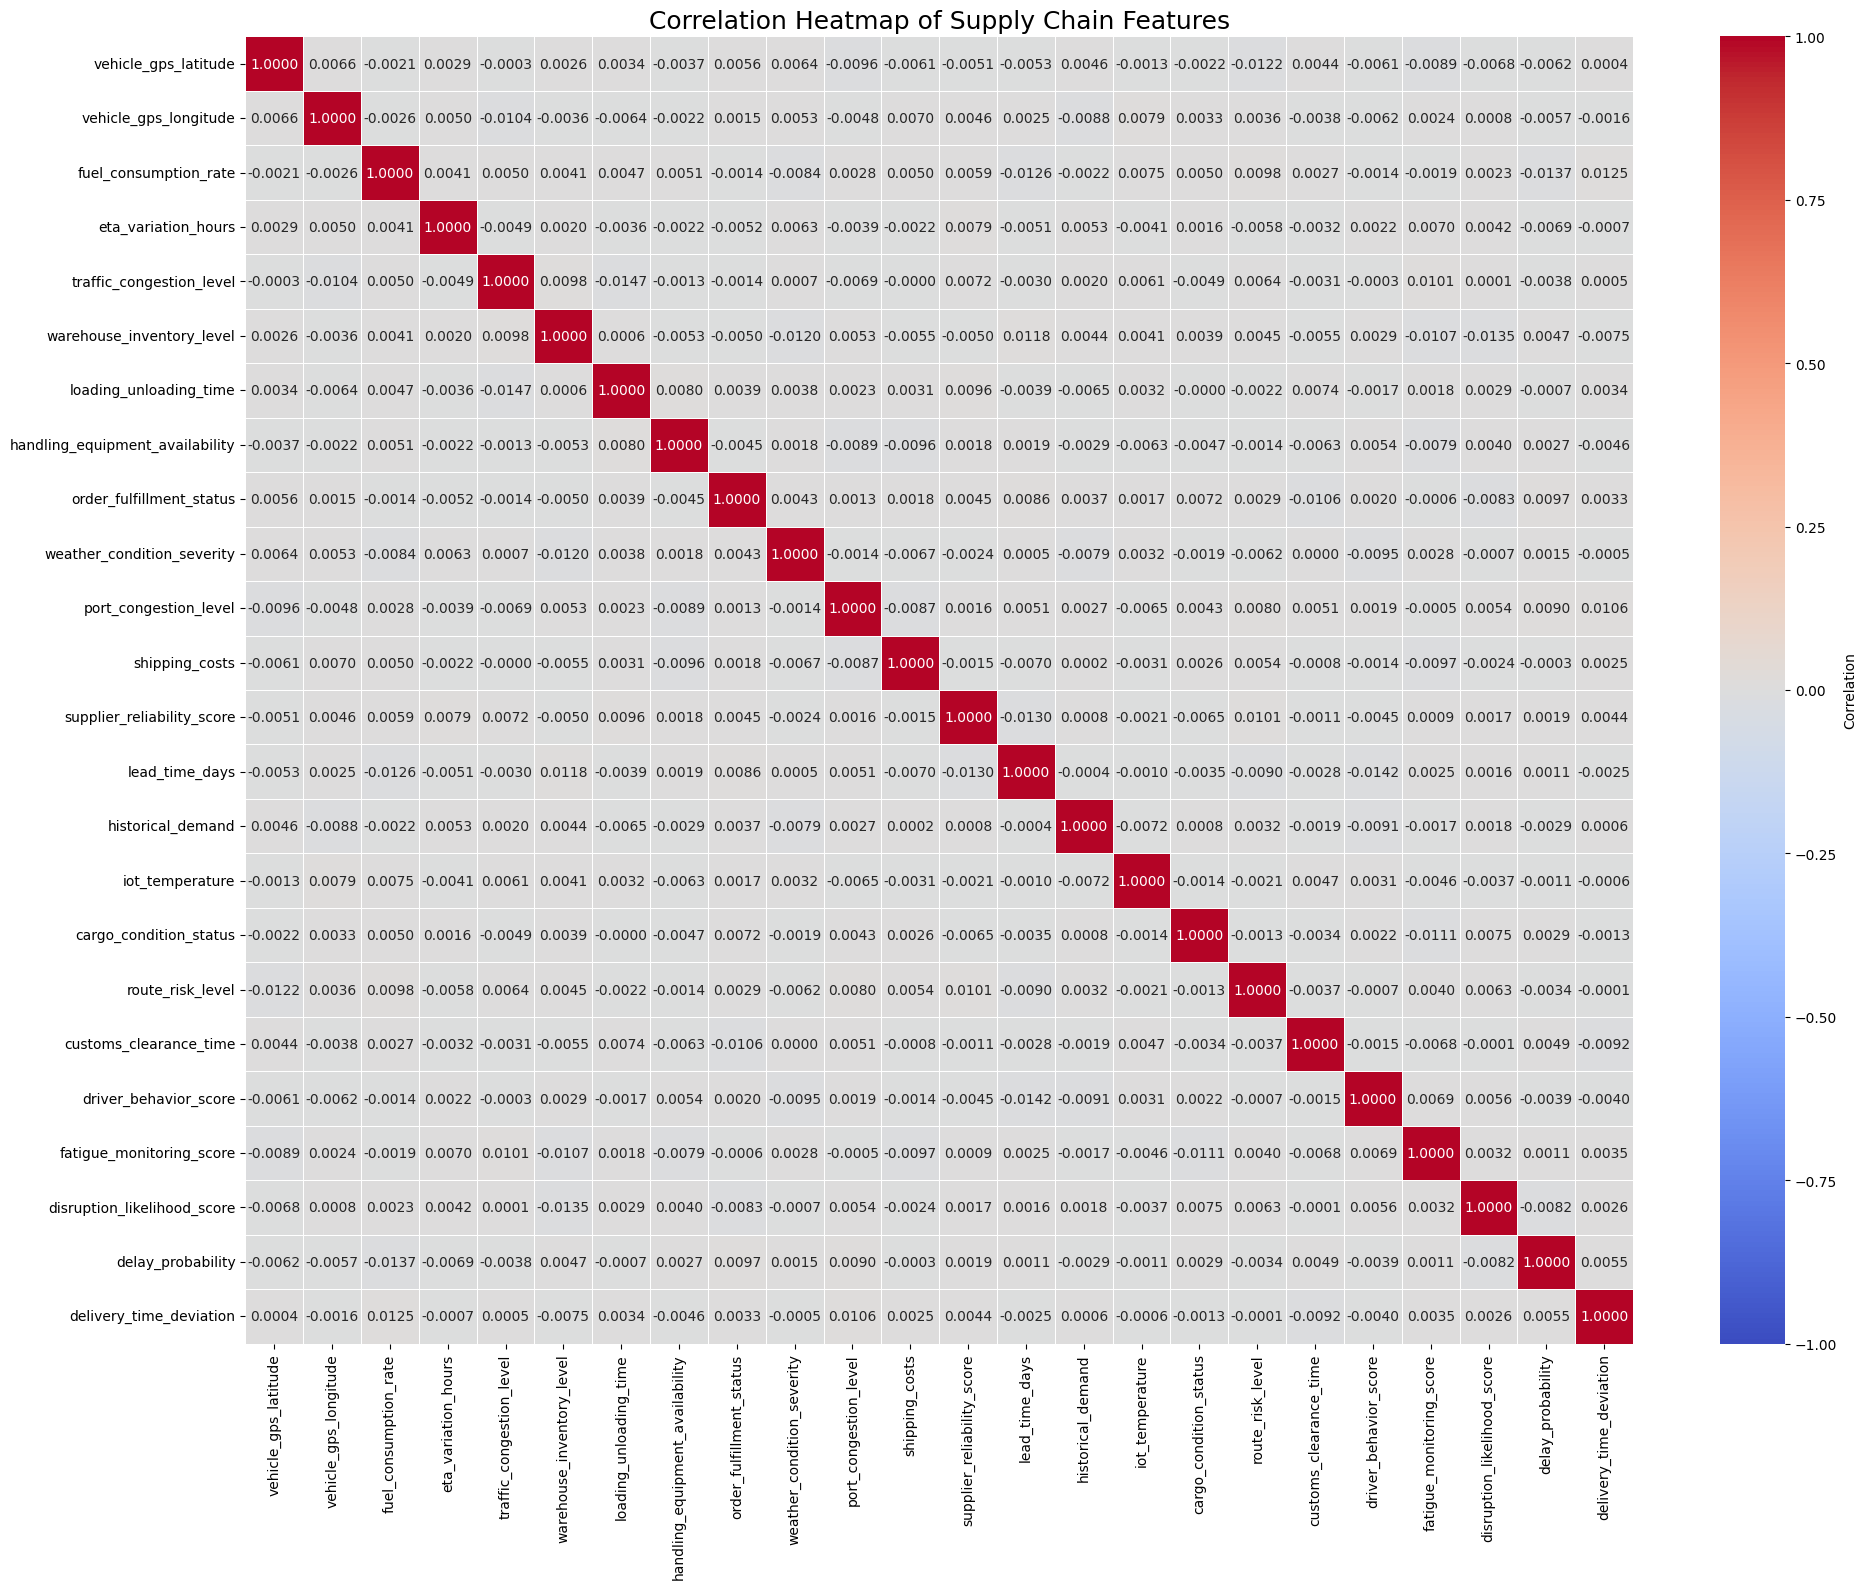

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric features
df_numeric = df.drop(columns=["timestamp", "risk_classification"])

# Compute correlation matrix
corr = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(
    corr,
    annot=True,        # show correlation values
    fmt=".4f",         # 2 decimals
    cmap="coolwarm",   # color map
    vmin=-1, vmax=1,   # range fixed
    linewidths=0.5,
    cbar_kws={"label": "Correlation"}
)
plt.title("Correlation Heatmap of Supply Chain Features", fontsize=18)
plt.tight_layout()
plt.show()



#### Consider explicit type casting: timestamps → datetime
#### binary flags → {0,1};
#### categorical labels → ordered categories.

In [9]:
binary_like_cols = []
for col in df.select_dtypes(include=[np.number]).columns:
    vals = df[col].dropna().unique()
    if df[col].between(0,1).all() and df[col].nunique() <= 10:
        binary_like_cols.append(col)

print("Potential binary-like columns:", binary_like_cols)
for col in binary_like_cols:
    print(f"{col} -> unique sample: {df[col].unique()[:10]}")


Potential binary-like columns: []


In [10]:
import pandas as pd

# Make a copy so we don't modify the original df
clean_df = df.copy()

# 1. Timestamps → datetime
if "timestamp" in clean_df.columns:
    clean_df["timestamp"] = pd.to_datetime(clean_df["timestamp"], errors="coerce")

# 2. Binary flags → cast to int {0,1} #Not found

# 3. Categorical labels → ordered categories
if "risk_classification" in clean_df.columns:
    categories = ["Low Risk", "Moderate Risk", "High Risk"]
    clean_df["risk_classification"] = pd.Categorical(
        clean_df["risk_classification"], 
        categories=categories, 
        ordered=True
    )

# Print dtypes to confirm
print("Updated dtypes:\n", clean_df.dtypes)


Updated dtypes:
 timestamp                          datetime64[ns]
vehicle_gps_latitude                      float64
vehicle_gps_longitude                     float64
fuel_consumption_rate                     float64
eta_variation_hours                       float64
traffic_congestion_level                  float64
warehouse_inventory_level                 float64
loading_unloading_time                    float64
handling_equipment_availability           float64
order_fulfillment_status                  float64
weather_condition_severity                float64
port_congestion_level                     float64
shipping_costs                            float64
supplier_reliability_score                float64
lead_time_days                            float64
historical_demand                         float64
iot_temperature                           float64
cargo_condition_status                    float64
route_risk_level                          float64
customs_clearance_time           

In [11]:
import pandas as pd

# Make sure timestamp is datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

# Count rows per year
year_counts = df["timestamp"].dt.year.value_counts().sort_index()
print("Rows per year:\n", year_counts)

Rows per year:
 timestamp
2021    8760
2022    8760
2023    8760
2024    5785
Name: count, dtype: int64


### Preparation for time series and target variables

In [12]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, matplotlib.dates as mdates

# Ensure timestamp is datetime
df["timestamp"] = pd.to_datetime(df.get("timestamp"), errors="coerce")
df = df.sort_values("timestamp")

# Create risk_code if risk_classification exists
if "risk_code" not in df.columns:
    if "risk_classification" in df.columns:
        mapping = {"Low Risk": 0, "Moderate Risk": 1, "High Risk": 2}
        df["risk_code"] = df["risk_classification"].map(mapping)
    else:
        # If you truly don't have risk_classification, we'll skip that plot later
        df["risk_code"] = pd.NA

### 2021

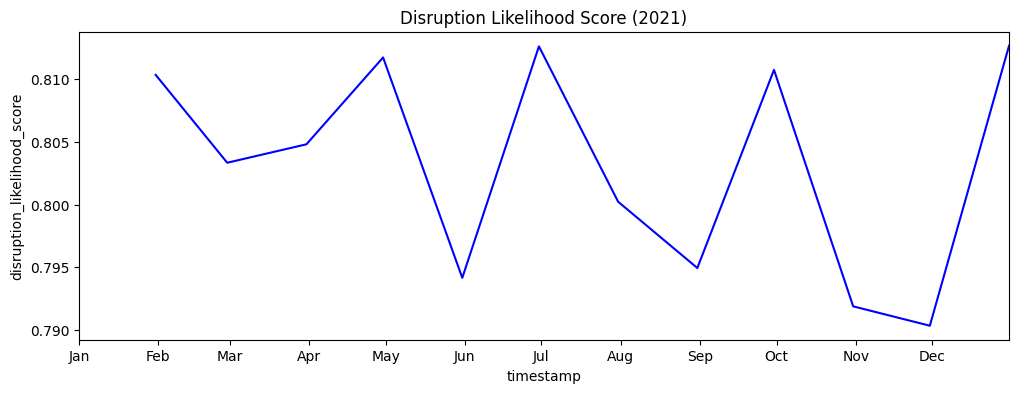

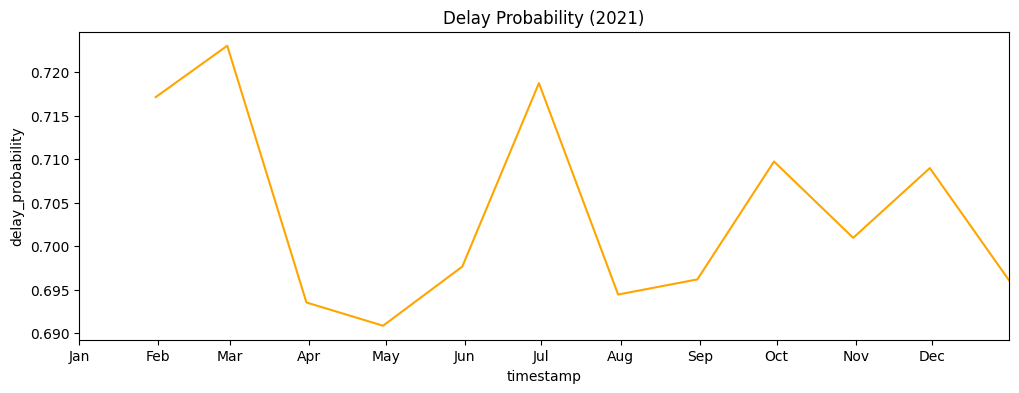

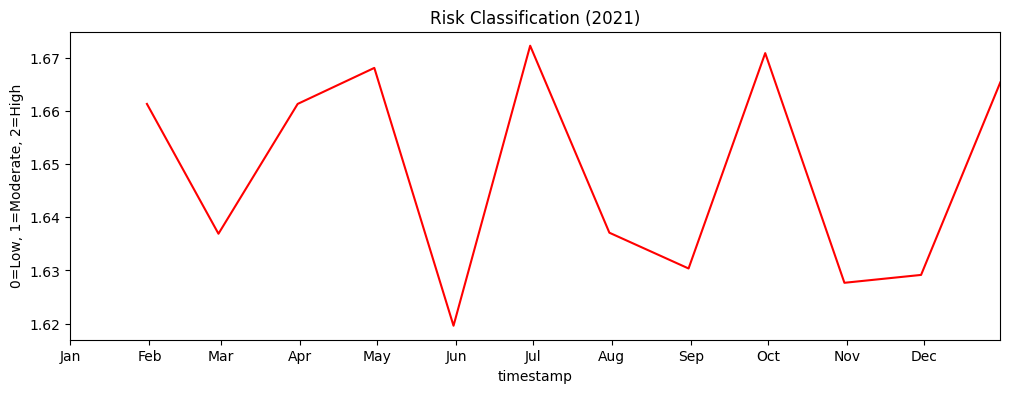

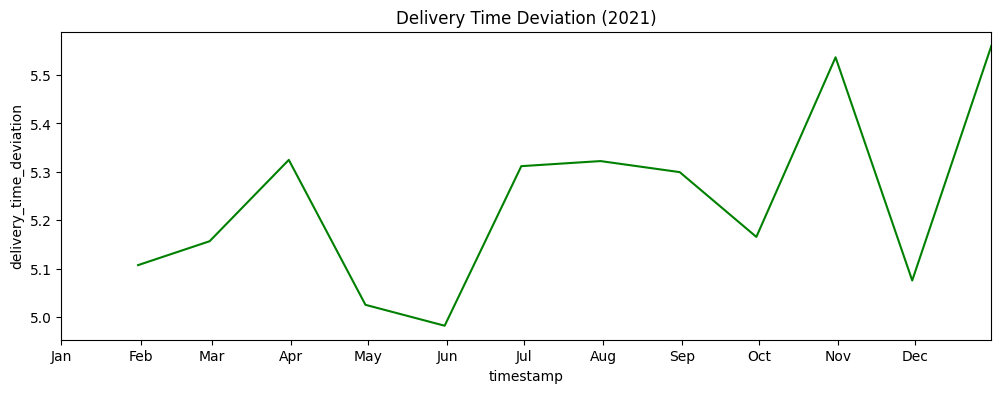

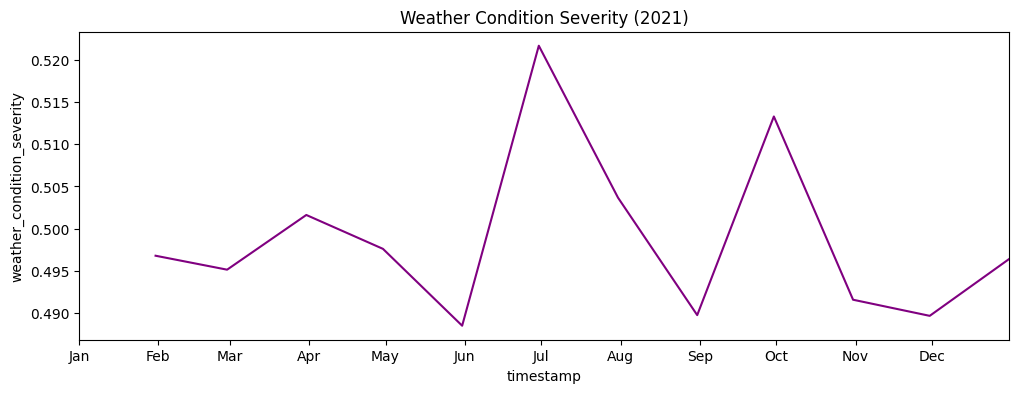

In [13]:
import matplotlib.dates as mdates

year = 2021
yearly = df[df["timestamp"].dt.year == year]
if yearly.empty:
    print(f"No data for {year}")
else:
    monthly = yearly.set_index("timestamp").resample("ME").mean(numeric_only=True)
    monthly_risk = yearly.set_index("timestamp")["risk_code"].resample("ME").mean()

    # A) Disruption Likelihood
    plt.figure(figsize=(12,4))
    sns.lineplot(x=monthly.index, y=monthly["disruption_likelihood_score"], color="blue")
    plt.title(f"Disruption Likelihood Score ({year})")
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.xlim(pd.Timestamp(f"{year}-01-01"), pd.Timestamp(f"{year}-12-31"))
    plt.show()

    # B) Delay Probability
    plt.figure(figsize=(12,4))
    sns.lineplot(x=monthly.index, y=monthly["delay_probability"], color="orange")
    plt.title(f"Delay Probability ({year})")
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.xlim(pd.Timestamp(f"{year}-01-01"), pd.Timestamp(f"{year}-12-31"))
    plt.show()

    # C) Risk Classification
    plt.figure(figsize=(12,4))
    sns.lineplot(x=monthly_risk.index, y=monthly_risk, color="red")
    plt.title(f"Risk Classification ({year})")
    plt.ylabel("0=Low, 1=Moderate, 2=High")
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.xlim(pd.Timestamp(f"{year}-01-01"), pd.Timestamp(f"{year}-12-31"))
    plt.show()

    # D) Delivery Deviation
    plt.figure(figsize=(12,4))
    sns.lineplot(x=monthly.index, y=monthly["delivery_time_deviation"], color="green")
    plt.title(f"Delivery Time Deviation ({year})")
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.xlim(pd.Timestamp(f"{year}-01-01"), pd.Timestamp(f"{year}-12-31"))
    plt.show()

    # E) Weather Severity
    plt.figure(figsize=(12,4))
    sns.lineplot(x=monthly.index, y=monthly["weather_condition_severity"], color="purple")
    plt.title(f"Weather Condition Severity ({year})")
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.xlim(pd.Timestamp(f"{year}-01-01"), pd.Timestamp(f"{year}-12-31"))
    plt.show()


### 2022

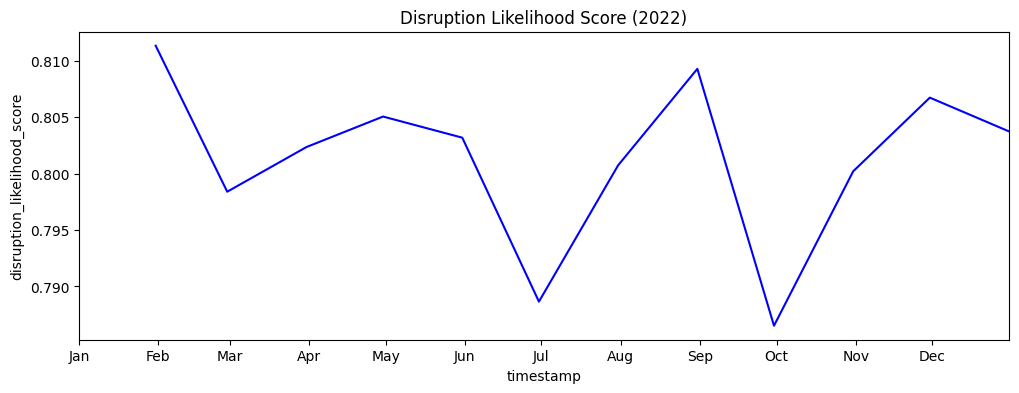

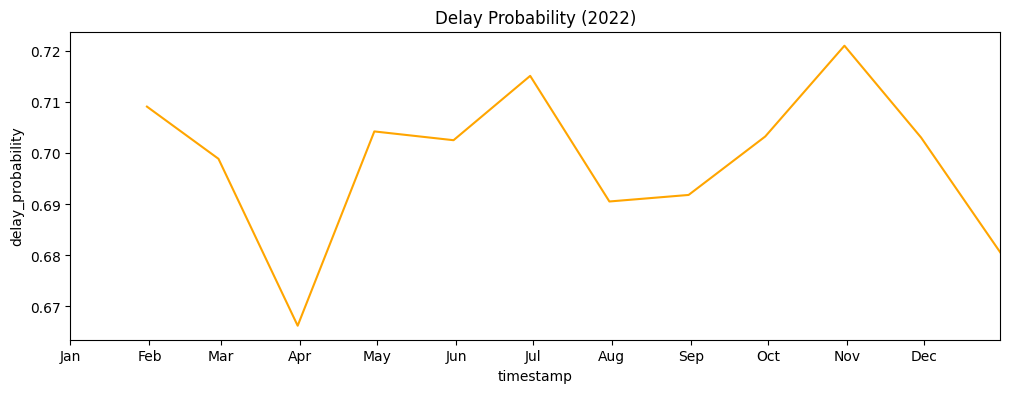

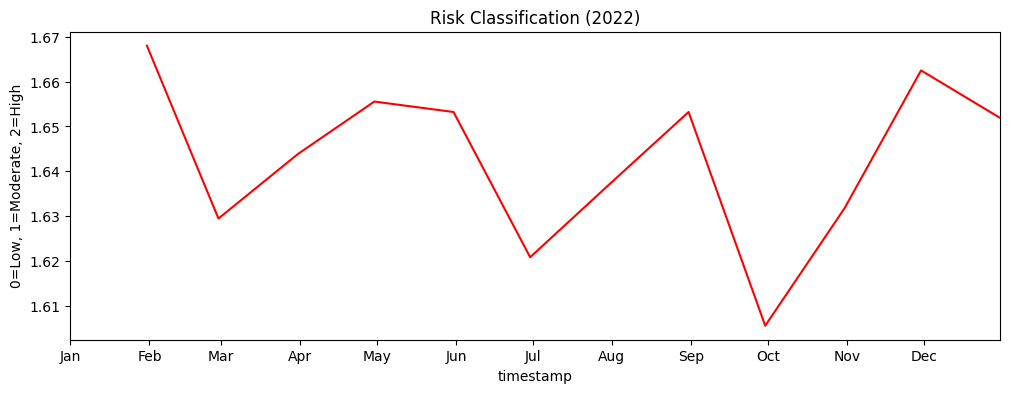

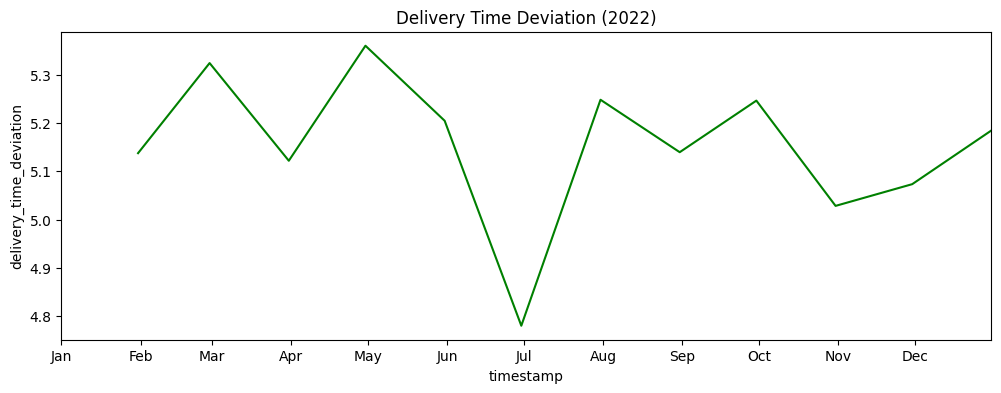

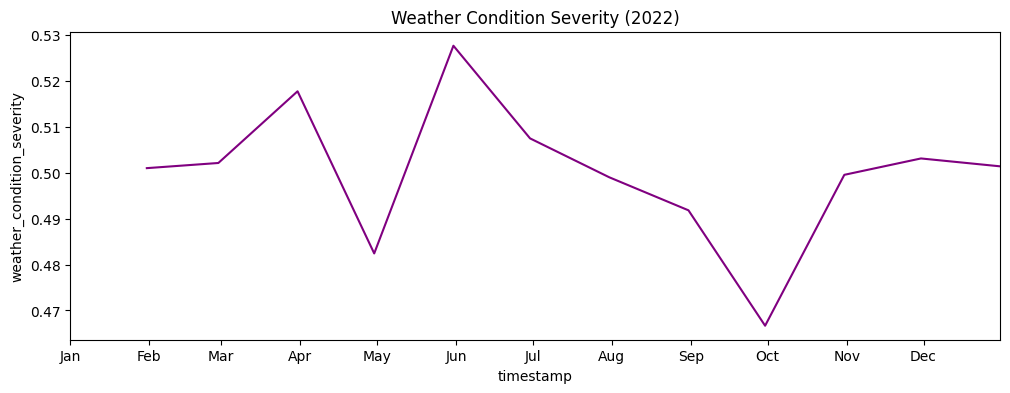

In [14]:
import matplotlib.dates as mdates

year = 2022
yearly = df[df["timestamp"].dt.year == year]
if yearly.empty:
    print(f"No data for {year}")
else:
    monthly = yearly.set_index("timestamp").resample("ME").mean(numeric_only=True)
    monthly_risk = yearly.set_index("timestamp")["risk_code"].resample("ME").mean()

    # A) Disruption Likelihood
    plt.figure(figsize=(12,4))
    sns.lineplot(x=monthly.index, y=monthly["disruption_likelihood_score"], color="blue")
    plt.title(f"Disruption Likelihood Score ({year})")
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.xlim(pd.Timestamp(f"{year}-01-01"), pd.Timestamp(f"{year}-12-31"))
    plt.show()

    # B) Delay Probability
    plt.figure(figsize=(12,4))
    sns.lineplot(x=monthly.index, y=monthly["delay_probability"], color="orange")
    plt.title(f"Delay Probability ({year})")
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.xlim(pd.Timestamp(f"{year}-01-01"), pd.Timestamp(f"{year}-12-31"))
    plt.show()

    # C) Risk Classification
    plt.figure(figsize=(12,4))
    sns.lineplot(x=monthly_risk.index, y=monthly_risk, color="red")
    plt.title(f"Risk Classification ({year})")
    plt.ylabel("0=Low, 1=Moderate, 2=High")
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.xlim(pd.Timestamp(f"{year}-01-01"), pd.Timestamp(f"{year}-12-31"))
    plt.show()

    # D) Delivery Deviation
    plt.figure(figsize=(12,4))
    sns.lineplot(x=monthly.index, y=monthly["delivery_time_deviation"], color="green")
    plt.title(f"Delivery Time Deviation ({year})")
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.xlim(pd.Timestamp(f"{year}-01-01"), pd.Timestamp(f"{year}-12-31"))
    plt.show()

    # E) Weather Severity
    plt.figure(figsize=(12,4))
    sns.lineplot(x=monthly.index, y=monthly["weather_condition_severity"], color="purple")
    plt.title(f"Weather Condition Severity ({year})")
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.xlim(pd.Timestamp(f"{year}-01-01"), pd.Timestamp(f"{year}-12-31"))
    plt.show()


### 2023

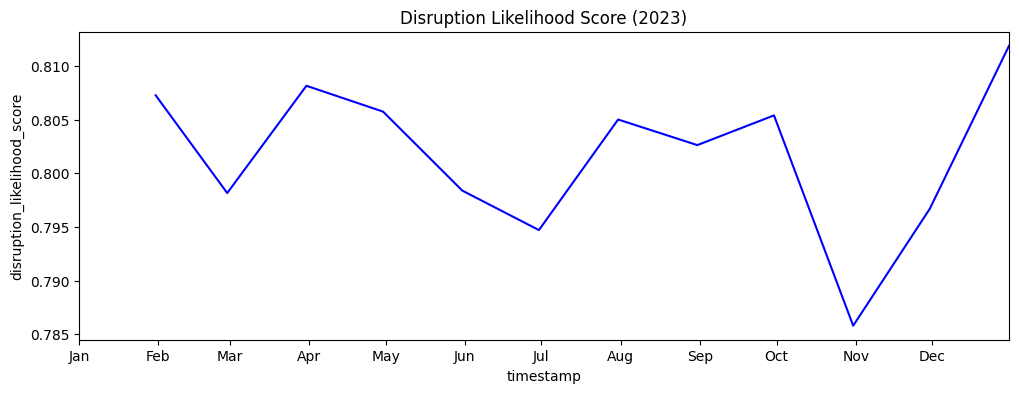

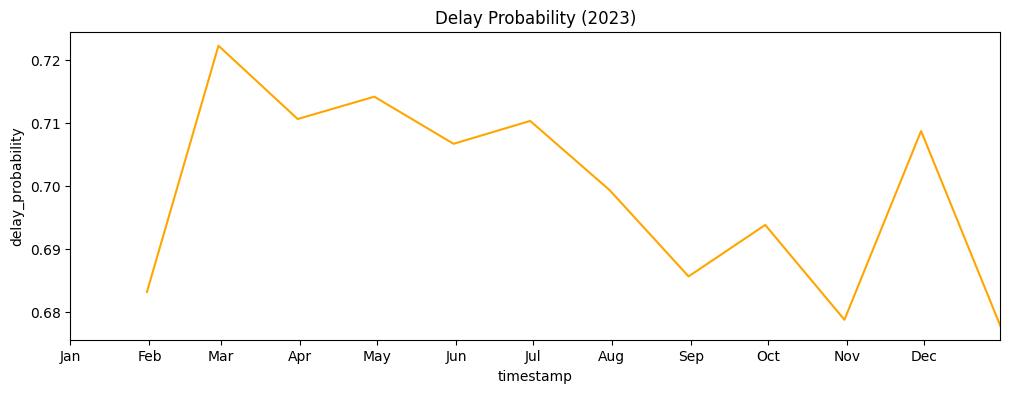

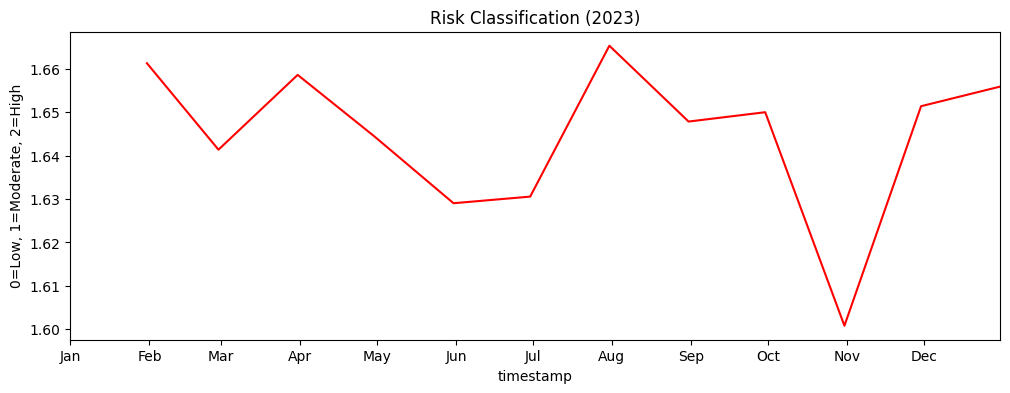

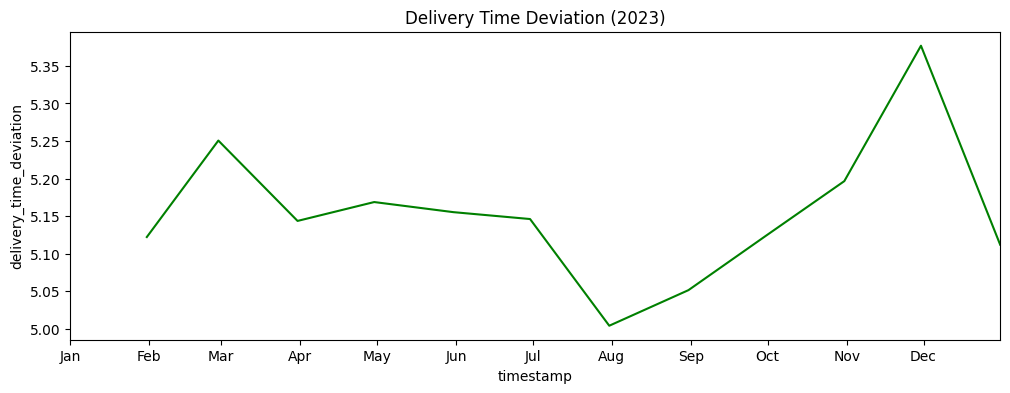

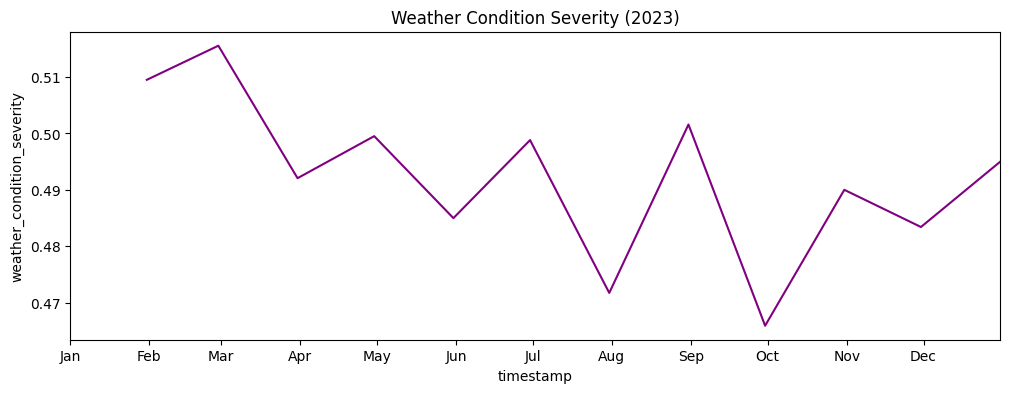

In [15]:
import matplotlib.dates as mdates

year = 2023
yearly = df[df["timestamp"].dt.year == year]
if yearly.empty:
    print(f"No data for {year}")
else:
    monthly = yearly.set_index("timestamp").resample("ME").mean(numeric_only=True)
    monthly_risk = yearly.set_index("timestamp")["risk_code"].resample("ME").mean()

    # A) Disruption Likelihood
    plt.figure(figsize=(12,4))
    sns.lineplot(x=monthly.index, y=monthly["disruption_likelihood_score"], color="blue")
    plt.title(f"Disruption Likelihood Score ({year})")
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.xlim(pd.Timestamp(f"{year}-01-01"), pd.Timestamp(f"{year}-12-31"))
    plt.show()

    # B) Delay Probability
    plt.figure(figsize=(12,4))
    sns.lineplot(x=monthly.index, y=monthly["delay_probability"], color="orange")
    plt.title(f"Delay Probability ({year})")
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.xlim(pd.Timestamp(f"{year}-01-01"), pd.Timestamp(f"{year}-12-31"))
    plt.show()

    # C) Risk Classification
    plt.figure(figsize=(12,4))
    sns.lineplot(x=monthly_risk.index, y=monthly_risk, color="red")
    plt.title(f"Risk Classification ({year})")
    plt.ylabel("0=Low, 1=Moderate, 2=High")
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.xlim(pd.Timestamp(f"{year}-01-01"), pd.Timestamp(f"{year}-12-31"))
    plt.show()

    # D) Delivery Deviation
    plt.figure(figsize=(12,4))
    sns.lineplot(x=monthly.index, y=monthly["delivery_time_deviation"], color="green")
    plt.title(f"Delivery Time Deviation ({year})")
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.xlim(pd.Timestamp(f"{year}-01-01"), pd.Timestamp(f"{year}-12-31"))
    plt.show()

    # E) Weather Severity
    plt.figure(figsize=(12,4))
    sns.lineplot(x=monthly.index, y=monthly["weather_condition_severity"], color="purple")
    plt.title(f"Weather Condition Severity ({year})")
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.xlim(pd.Timestamp(f"{year}-01-01"), pd.Timestamp(f"{year}-12-31"))
    plt.show()


### 2024

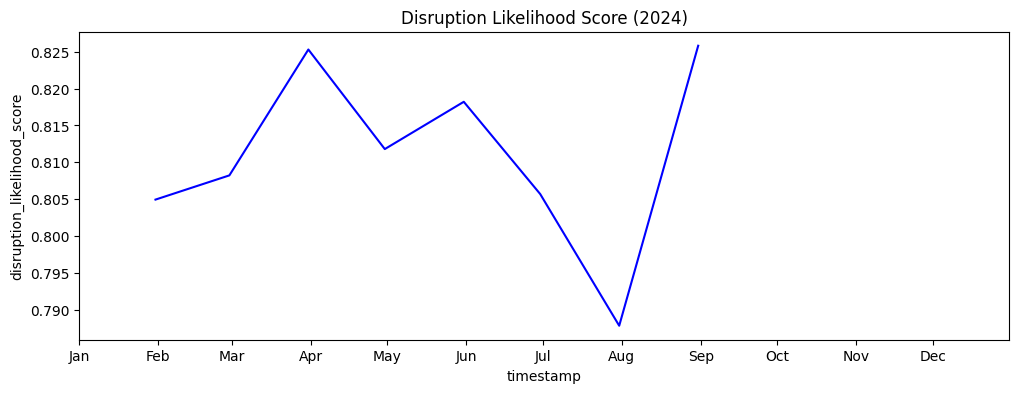

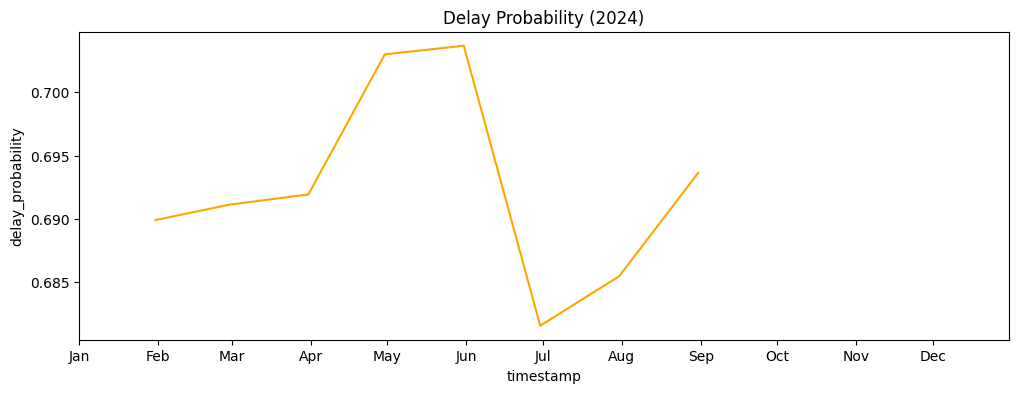

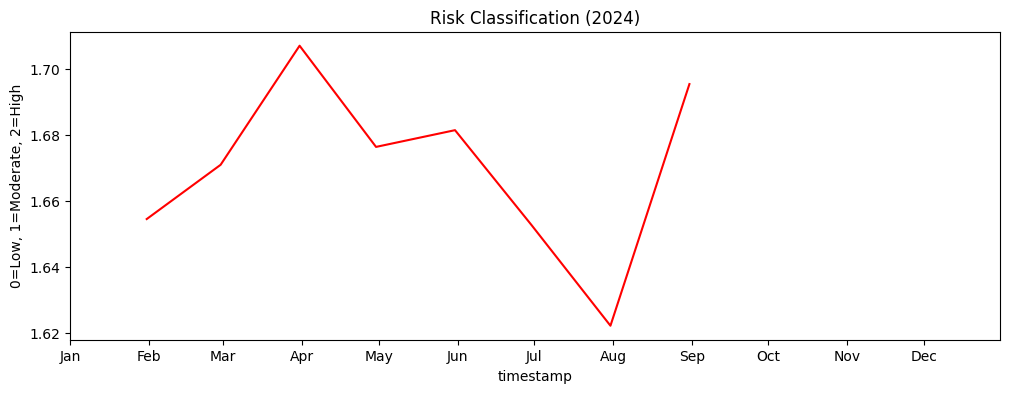

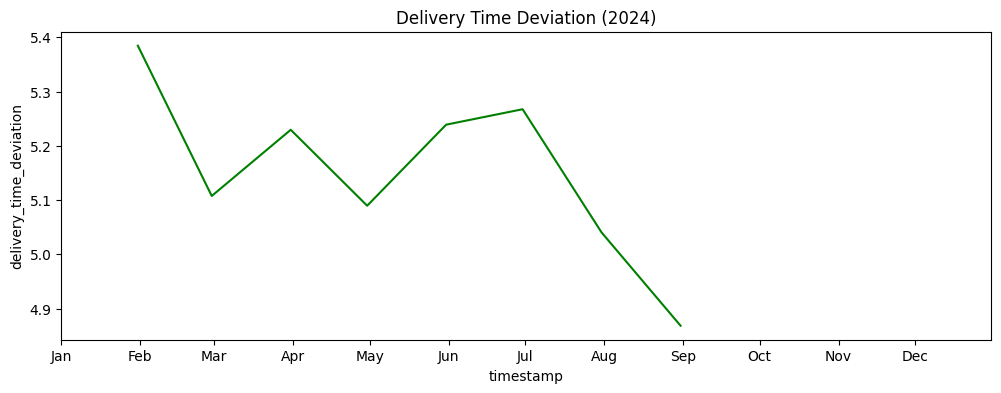

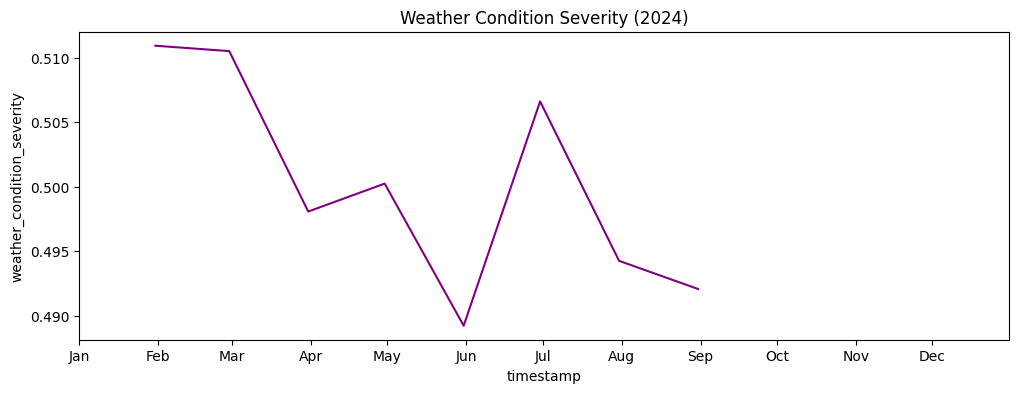

In [16]:
import matplotlib.dates as mdates

year = 2024
yearly = df[df["timestamp"].dt.year == year]
if yearly.empty:
    print(f"No data for {year}")
else:
    monthly = yearly.set_index("timestamp").resample("ME").mean(numeric_only=True)
    monthly_risk = yearly.set_index("timestamp")["risk_code"].resample("ME").mean()

    # A) Disruption Likelihood
    plt.figure(figsize=(12,4))
    sns.lineplot(x=monthly.index, y=monthly["disruption_likelihood_score"], color="blue")
    plt.title(f"Disruption Likelihood Score ({year})")
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.xlim(pd.Timestamp(f"{year}-01-01"), pd.Timestamp(f"{year}-12-31"))
    plt.show()

    # B) Delay Probability
    plt.figure(figsize=(12,4))
    sns.lineplot(x=monthly.index, y=monthly["delay_probability"], color="orange")
    plt.title(f"Delay Probability ({year})")
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.xlim(pd.Timestamp(f"{year}-01-01"), pd.Timestamp(f"{year}-12-31"))
    plt.show()

    # C) Risk Classification
    plt.figure(figsize=(12,4))
    sns.lineplot(x=monthly_risk.index, y=monthly_risk, color="red")
    plt.title(f"Risk Classification ({year})")
    plt.ylabel("0=Low, 1=Moderate, 2=High")
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.xlim(pd.Timestamp(f"{year}-01-01"), pd.Timestamp(f"{year}-12-31"))
    plt.show()

    # D) Delivery Deviation
    plt.figure(figsize=(12,4))
    sns.lineplot(x=monthly.index, y=monthly["delivery_time_deviation"], color="green")
    plt.title(f"Delivery Time Deviation ({year})")
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.xlim(pd.Timestamp(f"{year}-01-01"), pd.Timestamp(f"{year}-12-31"))
    plt.show()

    # E) Weather Severity
    plt.figure(figsize=(12,4))
    sns.lineplot(x=monthly.index, y=monthly["weather_condition_severity"], color="purple")
    plt.title(f"Weather Condition Severity ({year})")
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.xlim(pd.Timestamp(f"{year}-01-01"), pd.Timestamp(f"{year}-12-31"))
    plt.show()


### Top 5 features from 2021 - 2024
Top 5 features for Disruption Likelihood <br>
Top 5 features for Delay Probability <br>
Top 5 features for Risk Classification <br>
Top 5 features for Delivery Time Deviation <br>
(Results ranked by Permutation Importance (impact on prediction))

### Forecasting for target feature and cost

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

def forecast_target(df, target_col, freq="ME"):
    """
    Forecasts a numeric target column using ARIMA and SARIMA.
    Train = up to 2023-12, Test = 2024 (time-based split).
    freq="ME" = month-end (use "W" for weekly, "D" for daily).
    """
    # 1) Prep
    df = df.copy()
    df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
    ts = df.set_index("timestamp")[target_col].resample(freq).mean().dropna()

    # 2) Split
    train = ts[:'2023-12']
    test  = ts['2024-01':]
    if len(test) == 0:
        print(f"\n[{target_col}] No test data available for 2024.")
        return

    # ------------------ ARIMA ------------------
    print(f"\n=== ARIMA Forecasting for {target_col} ===")
    try:
        arima_fit = ARIMA(train, order=(1,1,1)).fit()
        pred = arima_fit.forecast(steps=len(test))
        mae  = mean_absolute_error(test, pred)
        rmse = mean_squared_error(test, pred, squared=False)
        mape = (abs((test - pred) / test).mean()) * 100
        print(f"ARIMA → MAE={mae:.3f}, RMSE={rmse:.3f}, MAPE={mape:.2f}%")

        plt.figure(figsize=(12,5))
        plt.plot(train.index, train, label="Train")
        plt.plot(test.index,  test,  label="Test",  color="orange")
        plt.plot(test.index,  pred,  label="ARIMA Forecast", color="red")
        plt.title(f"ARIMA Forecast • {target_col}")
        plt.legend(); plt.tight_layout(); plt.show()
    except Exception as e:
        print(f"ARIMA failed for {target_col}: {e}")

    # ------------------ SARIMA ------------------
    print(f"\n=== SARIMA Forecasting for {target_col} ===")
    try:
        sarima_fit = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12)).fit(disp=False)
        pred = sarima_fit.forecast(steps=len(test))
        mae  = mean_absolute_error(test, pred)
        rmse = mean_squared_error(test, pred, squared=False)
        mape = (abs((test - pred) / test).mean()) * 100
        print(f"SARIMA → MAE={mae:.3f}, RMSE={rmse:.3f}, MAPE={mape:.2f}%")

        plt.figure(figsize=(12,5))
        plt.plot(train.index, train, label="Train")
        plt.plot(test.index,  test,  label="Test",  color="orange")
        plt.plot(test.index,  pred,  label="SARIMA Forecast", color="purple")
        plt.title(f"SARIMA Forecast • {target_col}")
        plt.legend(); plt.tight_layout(); plt.show()
    except Exception as e:
        print(f"SARIMA failed for {target_col}: {e}")


def forecast_risk_counts(df, freq="ME"):
    """
    Converts risk_classification to monthly counts per class, then
    fits SARIMA for each class series (Low/Moderate/High) with 2024 as test.
    """
    if "risk_classification" not in df.columns:
        print("risk_classification not found.")
        return

    df = df.copy()
    df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
    df = df.dropna(subset=["timestamp", "risk_classification"])

    # Monthly counts per class
    monthly_counts = (
        df.set_index("timestamp")
          .groupby(pd.Grouper(freq=freq))["risk_classification"]
          .value_counts()
          .unstack(fill_value=0)
    )

    # For each class, do a SARIMA forecast
    for cls in monthly_counts.columns:
        ts = monthly_counts[cls].astype(float)
        train = ts[:'2023-12']
        test  = ts['2024-01':]
        if len(test) == 0:
            print(f"\n[Risk={cls}] No test data available for 2024.")
            continue

        print(f"\n=== SARIMA Forecasting for Risk Class Count • {cls} ===")
        try:
            sarima_fit = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12)).fit(disp=False)
            pred = sarima_fit.forecast(steps=len(test))
            mae  = mean_absolute_error(test, pred)
            rmse = mean_squared_error(test, pred, squared=False)
            mape = (abs((test - pred) / test.replace(0, np.nan)).mean()) * 100  # safe MAPE

            print(f"SARIMA (counts) → MAE={mae:.3f}, RMSE={rmse:.3f}, MAPE≈{mape:.2f}%")

            plt.figure(figsize=(12,5))
            plt.plot(train.index, train, label="Train")
            plt.plot(test.index,  test,  label="Test",  color="orange")
            plt.plot(test.index,  pred,  label="SARIMA Forecast", color="purple")
            plt.title(f"Monthly Count Forecast • Risk={cls}")
            plt.legend(); plt.tight_layout(); plt.show()
        except Exception as e:
            print(f"SARIMA failed for Risk={cls}: {e}")


# A) Disruption Likelihood Score
forecast_target(df, "disruption_likelihood_score")

# B) Delay Probability
forecast_target(df, "delay_probability")

# D) Delivery Time Deviation
forecast_target(df, "delivery_time_deviation")

# Costs (and other numeric drivers you care about)
forecast_target(df, "shipping_costs")

forecast_risk_counts(df)



=== ARIMA Forecasting for disruption_likelihood_score ===
ARIMA failed for disruption_likelihood_score: got an unexpected keyword argument 'squared'

=== SARIMA Forecasting for disruption_likelihood_score ===


/Users/mac/tuto/machine_learning_and_data_mining/sudata-datathon-2025/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/mac/tuto/machine_learning_and_data_mining/sudata-datathon-2025/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA failed for disruption_likelihood_score: got an unexpected keyword argument 'squared'

=== ARIMA Forecasting for delay_probability ===
ARIMA failed for delay_probability: got an unexpected keyword argument 'squared'

=== SARIMA Forecasting for delay_probability ===


/Users/mac/tuto/machine_learning_and_data_mining/sudata-datathon-2025/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/mac/tuto/machine_learning_and_data_mining/sudata-datathon-2025/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/mac/tuto/machine_learning_and_data_mining/sudata-datathon-2025/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA failed for delay_probability: got an unexpected keyword argument 'squared'

=== ARIMA Forecasting for delivery_time_deviation ===
ARIMA failed for delivery_time_deviation: got an unexpected keyword argument 'squared'

=== SARIMA Forecasting for delivery_time_deviation ===


/Users/mac/tuto/machine_learning_and_data_mining/sudata-datathon-2025/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/mac/tuto/machine_learning_and_data_mining/sudata-datathon-2025/.venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/mac/tuto/machine_learning_and_data_mining/sudata-datathon-2025/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA failed for delivery_time_deviation: got an unexpected keyword argument 'squared'

=== ARIMA Forecasting for shipping_costs ===
ARIMA failed for shipping_costs: got an unexpected keyword argument 'squared'

=== SARIMA Forecasting for shipping_costs ===
SARIMA failed for shipping_costs: got an unexpected keyword argument 'squared'

=== SARIMA Forecasting for Risk Class Count • High Risk ===


/Users/mac/tuto/machine_learning_and_data_mining/sudata-datathon-2025/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/mac/tuto/machine_learning_and_data_mining/sudata-datathon-2025/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/mac/tuto/machine_learning_and_data_mining/sudata-datathon-2025/.venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/mac/tuto/machine_learning_and_data_mining/sudata-datathon

SARIMA failed for Risk=High Risk: got an unexpected keyword argument 'squared'

=== SARIMA Forecasting for Risk Class Count • Low Risk ===


/Users/mac/tuto/machine_learning_and_data_mining/sudata-datathon-2025/.venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/mac/tuto/machine_learning_and_data_mining/sudata-datathon-2025/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA failed for Risk=Low Risk: got an unexpected keyword argument 'squared'

=== SARIMA Forecasting for Risk Class Count • Moderate Risk ===
SARIMA failed for Risk=Moderate Risk: got an unexpected keyword argument 'squared'


/Users/mac/tuto/machine_learning_and_data_mining/sudata-datathon-2025/.venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


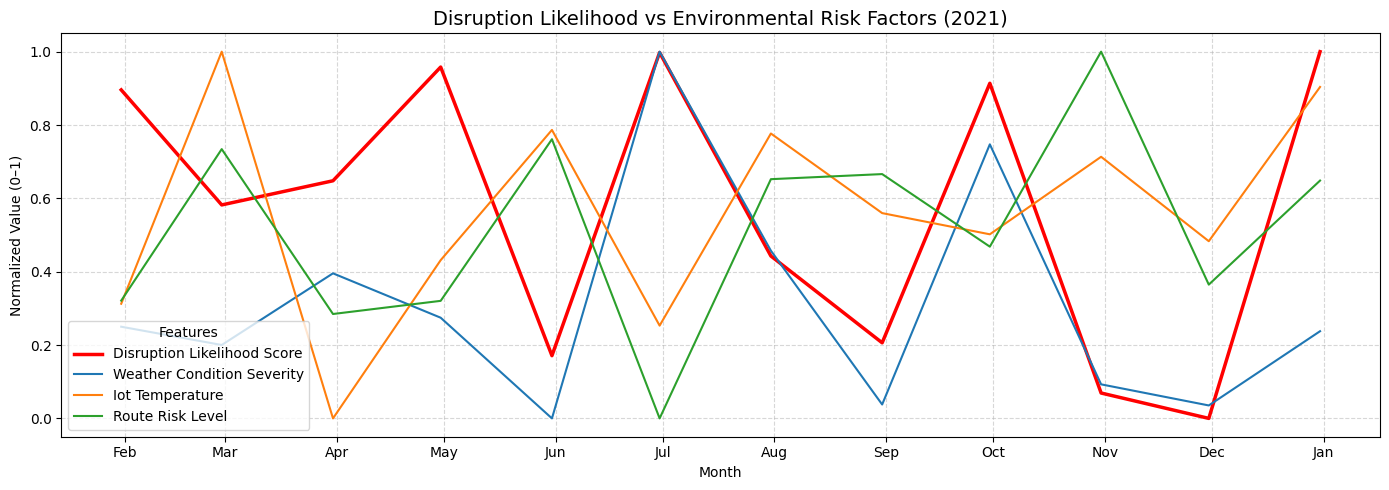

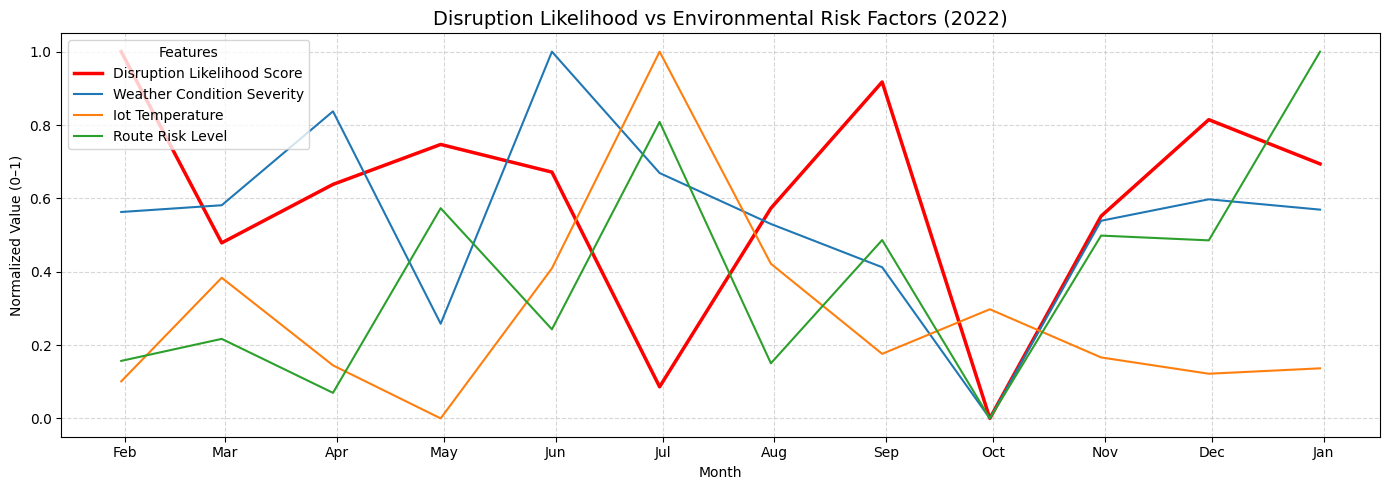

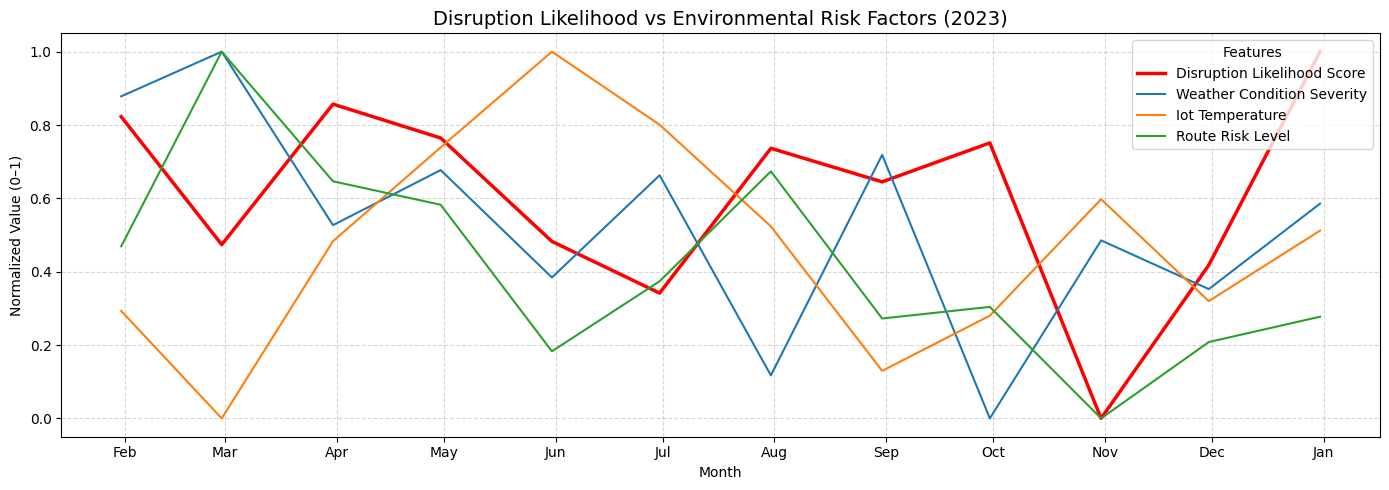

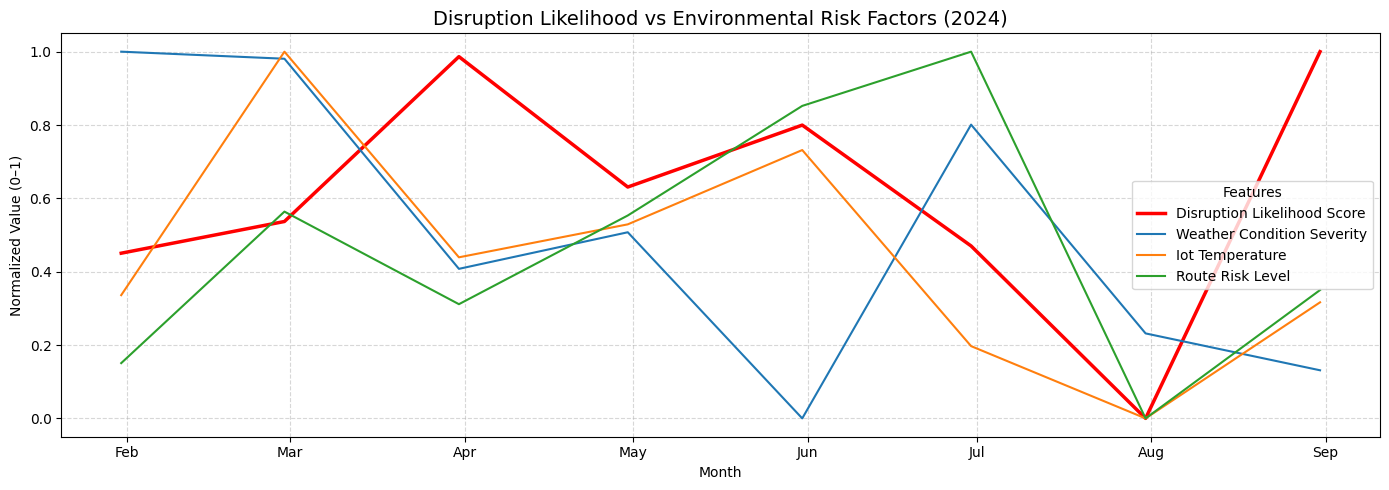

In [18]:
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# check the format
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

# Target + Natural/Environmental Features (no congestion levels)
features = [
    "disruption_likelihood_score",   
    "weather_condition_severity",
    "iot_temperature",
    "route_risk_level"
]

# Generate plots for each year
for year in [2021, 2022, 2023, 2024]:
    yearly = df[df["timestamp"].dt.year == year]
    if yearly.empty:
        print(f"{year}: No data")
        continue

    # Monthly mean
    monthly = yearly.set_index("timestamp").resample("ME").mean(numeric_only=True)

    # Keep only available features
    feat_avail = [f for f in features if f in monthly.columns]

    if not feat_avail:
        print(f"{year}: No valid features")
        continue

    # Normalize (0–1) for comparison
    scaler = MinMaxScaler()
    monthly_scaled = pd.DataFrame(
        scaler.fit_transform(monthly[feat_avail]),
        index=monthly.index,
        columns=feat_avail
    )

    # Plot
    plt.figure(figsize=(14, 5))
    for feature in monthly_scaled.columns:
        if feature == "disruption_likelihood_score":
            sns.lineplot(x=monthly_scaled.index, y=monthly_scaled[feature],
                         label="Disruption Likelihood Score", linewidth=2.5, color="red")
        else:
            sns.lineplot(x=monthly_scaled.index, y=monthly_scaled[feature],
                         label=feature.replace("_", " ").title())

    # X-axis formatting
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

    plt.title(f"Disruption Likelihood vs Environmental Risk Factors ({year})", fontsize=14)
    plt.xlabel("Month")
    plt.ylabel("Normalized Value (0–1)")
    plt.legend(title="Features")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

years = [2021, 2022, 2023, 2024]

target = "disruption_likelihood_score"
features = ["weather_condition_severity", "iot_temperature", "route_risk_level"]

# Loop yearly
for year in years:
    yearly = df[df["timestamp"].dt.year == year]
    if yearly.empty:
        print(f"\n=== {year} has no data ===")
        continue
    
    monthly = yearly.set_index("timestamp").resample("ME").mean(numeric_only=True)
    monthly = monthly[features + [target]].dropna()

    if len(monthly) < 6:
        print(f"\n=== {year} not enough data ===")
        continue

    print(f"\n================ {year} ================")
    
    # correlation
    corr = monthly.corr()[target].drop(target)
    print("Correlation with target:")
    print(corr.sort_values(ascending=False))

#feature importance using RF
    X = monthly[features]
    y = monthly[target]

    model = RandomForestRegressor(random_state=42, n_estimators=200)
    model.fit(X, y)
    
    importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
    print("\nFeature importance from Random Forest:")
    print(importance)



================ 2021 ================
Correlation with target:
weather_condition_severity    0.665975
iot_temperature              -0.262517
route_risk_level             -0.570729
Name: disruption_likelihood_score, dtype: float64

Feature importance from Random Forest:
weather_condition_severity    0.623423
route_risk_level              0.270429
iot_temperature               0.106148
dtype: float64

================ 2022 ================
Correlation with target:
weather_condition_severity    0.286407
route_risk_level              0.060083
iot_temperature              -0.668885
Name: disruption_likelihood_score, dtype: float64

Feature importance from Random Forest:
iot_temperature               0.509440
weather_condition_severity    0.254822
route_risk_level              0.235737
dtype: float64

================ 2023 ================
Correlation with target:
route_risk_level              0.371600
weather_condition_severity   -0.025490
iot_temperature              -0.171523
Name: disr

/var/folders/n8/c5c9dkr51rzf48c68dw5bzc40000gn/T/ipykernel_14660/695490588.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = yearly.set_index("timestamp").resample("M").mean(numeric_only=True)


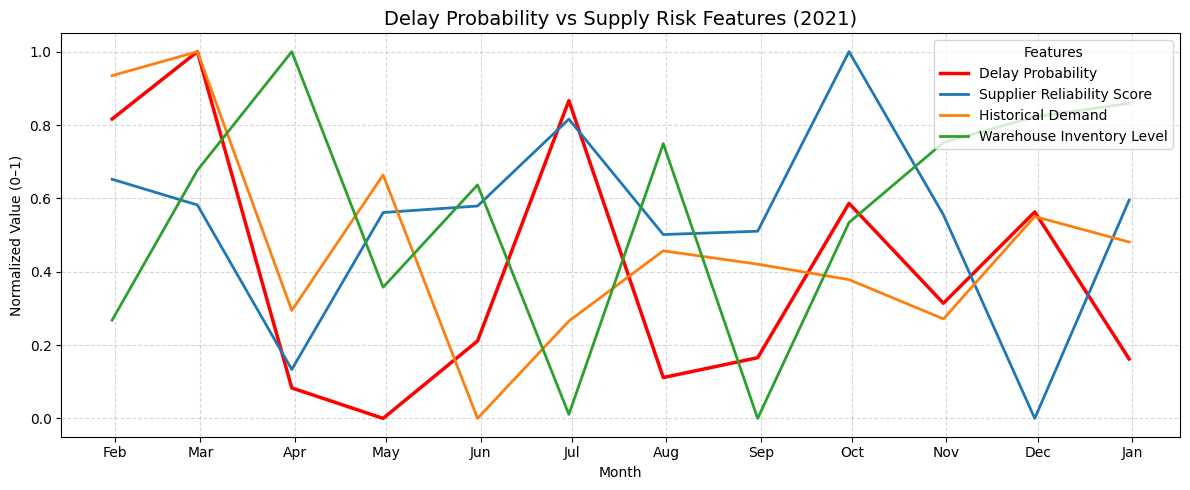

/var/folders/n8/c5c9dkr51rzf48c68dw5bzc40000gn/T/ipykernel_14660/695490588.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = yearly.set_index("timestamp").resample("M").mean(numeric_only=True)


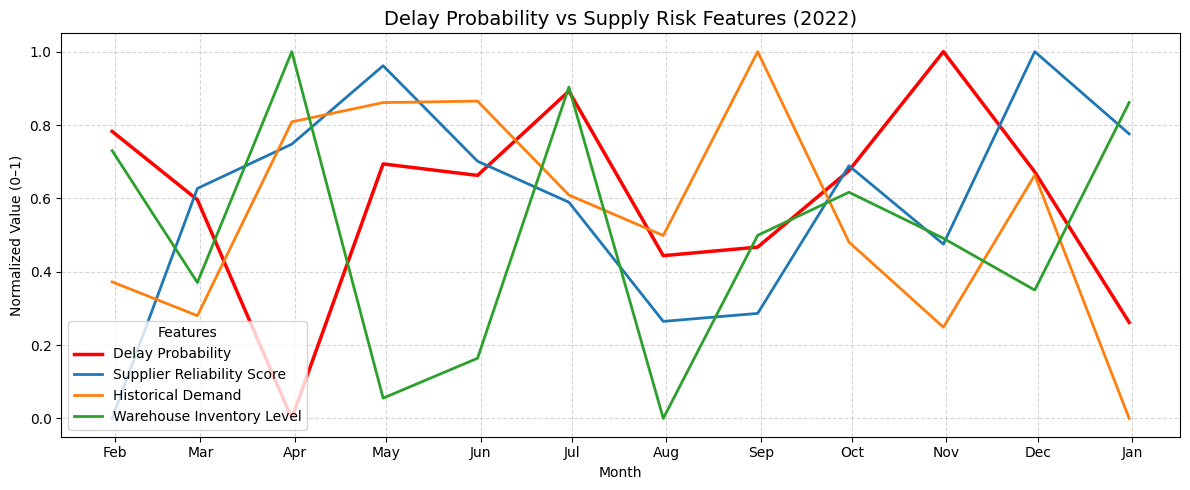

/var/folders/n8/c5c9dkr51rzf48c68dw5bzc40000gn/T/ipykernel_14660/695490588.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = yearly.set_index("timestamp").resample("M").mean(numeric_only=True)


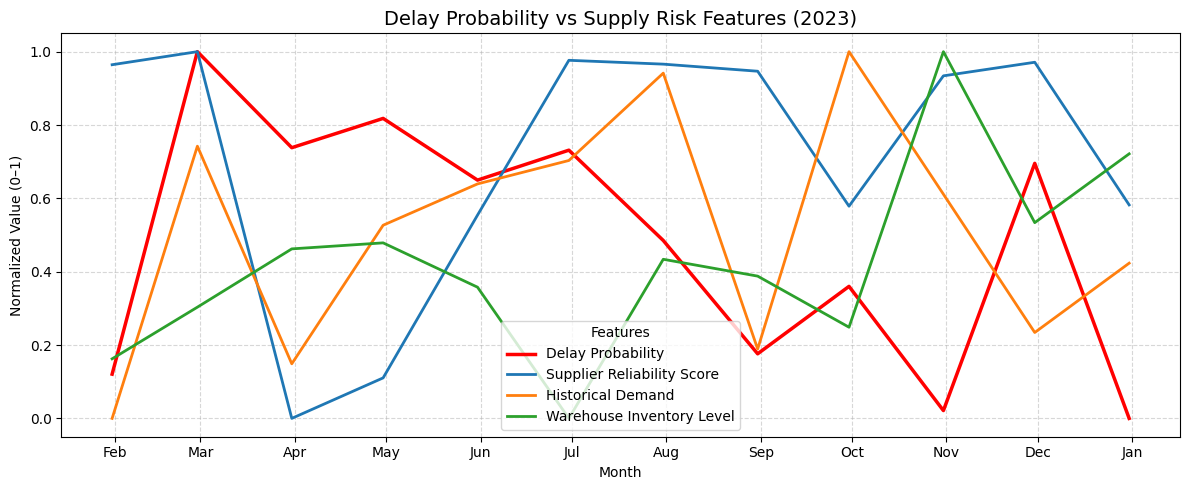

/var/folders/n8/c5c9dkr51rzf48c68dw5bzc40000gn/T/ipykernel_14660/695490588.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = yearly.set_index("timestamp").resample("M").mean(numeric_only=True)


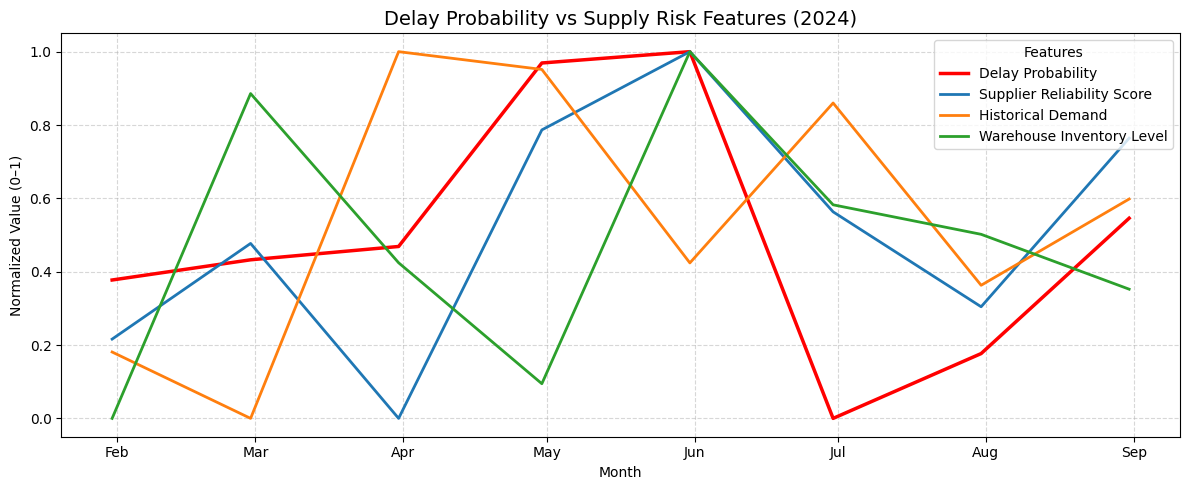

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# datetime confirmation
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

features = [
    "delay_probability",
    "supplier_reliability_score",
    "historical_demand",
    "warehouse_inventory_level"
]

#yearly plot
for year in [2021, 2022, 2023, 2024]:
    yearly = df[df["timestamp"].dt.year == year]
    if yearly.empty:
        print(f"No data for {year}")
        continue

    monthly = yearly.set_index("timestamp").resample("M").mean(numeric_only=True)


    valid_features = [f for f in features if f in monthly.columns]
    if not valid_features:
        print(f"No valid features for {year}")
        continue

    # Normalization
    scaler = MinMaxScaler()
    monthly_norm = pd.DataFrame(
        scaler.fit_transform(monthly[valid_features]),
        columns=valid_features,
        index=monthly.index
    )

    plt.figure(figsize=(12, 5))
    for feature in monthly_norm.columns:
        if feature == "delay_probability":
            sns.lineplot(x=monthly_norm.index, y=monthly_norm[feature],
                         label="Delay Probability", linewidth=2.5, color="red")
        else:
            sns.lineplot(x=monthly_norm.index, y=monthly_norm[feature],
                         label=feature.replace("_", " ").title(), linewidth=2)

    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    plt.title(f"Delay Probability vs Supply Risk Features ({year})", fontsize=14)
    plt.xlabel("Month")
    plt.ylabel("Normalized Value (0–1)")
    plt.legend(title="Features")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


In [21]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


years = [2021, 2022, 2023, 2024]

# Target & Features
target = "delay_probability"
features = ["supplier_reliability_score", "historical_demand", "warehouse_inventory_level"]

for year in years:
    yearly = df[df["timestamp"].dt.year == year]
    if yearly.empty:
        print(f"\n=== {year} has no data ===")
        continue

    monthly = yearly.set_index("timestamp").resample("M").mean(numeric_only=True)
    monthly = monthly[features + [target]].dropna()

    if len(monthly) < 6:
        print(f"\n=== {year} not enough data ===")
        continue

    print(f"\n================ {year} ================")

    # Pearson Correlation
    corr = monthly.corr()[target].drop(target)
    print("\nCorrelation with target:")
    for feat, val in corr.sort_values(ascending=False).items():
        print(f"  {feat:<30} {val:.3f}")

    # Random Forest Feature Importance (no split needed)
    X = monthly[features]
    y = monthly[target]

    model = RandomForestRegressor(random_state=42, n_estimators=200)
    model.fit(X, y)

    importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
    print("\nFeature importance from Random Forest:")
    for feat, val in importance.items():
        print(f"  {feat:<30} {val:.3f}")


/var/folders/n8/c5c9dkr51rzf48c68dw5bzc40000gn/T/ipykernel_14660/2908855153.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = yearly.set_index("timestamp").resample("M").mean(numeric_only=True)
/var/folders/n8/c5c9dkr51rzf48c68dw5bzc40000gn/T/ipykernel_14660/2908855153.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = yearly.set_index("timestamp").resample("M").mean(numeric_only=True)



================ 2021 ================

Correlation with target:
  historical_demand              0.472
  supplier_reliability_score     0.314
  warehouse_inventory_level      -0.283

Feature importance from Random Forest:
  supplier_reliability_score     0.637
  historical_demand              0.260
  warehouse_inventory_level      0.103

================ 2022 ================

Correlation with target:
  historical_demand              -0.115
  supplier_reliability_score     -0.160
  warehouse_inventory_level      -0.253

Feature importance from Random Forest:
  warehouse_inventory_level      0.550
  historical_demand              0.250
  supplier_reliability_score     0.201


/var/folders/n8/c5c9dkr51rzf48c68dw5bzc40000gn/T/ipykernel_14660/2908855153.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = yearly.set_index("timestamp").resample("M").mean(numeric_only=True)
/var/folders/n8/c5c9dkr51rzf48c68dw5bzc40000gn/T/ipykernel_14660/2908855153.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = yearly.set_index("timestamp").resample("M").mean(numeric_only=True)



================ 2023 ================

Correlation with target:
  historical_demand              0.221
  supplier_reliability_score     -0.247
  warehouse_inventory_level      -0.424

Feature importance from Random Forest:
  supplier_reliability_score     0.399
  warehouse_inventory_level      0.365
  historical_demand              0.236

================ 2024 ================

Correlation with target:
  supplier_reliability_score     0.594
  historical_demand              0.113
  warehouse_inventory_level      0.057

Feature importance from Random Forest:
  supplier_reliability_score     0.605
  warehouse_inventory_level      0.258
  historical_demand              0.138
